# Assignment on Classification
# Do the following in the iris dataset
# 1. Read the dataset to python environment

In [252]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [253]:
data = pd.read_excel('C:/Binu B/ICT Academy/Assignment for valuation/assign6/iris.xls') #read the data here

In [254]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [255]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [256]:
data.isna().sum() # we got null values, so we need to handle it.

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [257]:
data.shape

(150, 5)

In [258]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 2. Do the necessary pre-processing steps

Text(0.5, 0, 'SL')

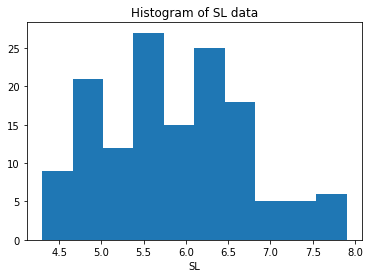

In [259]:
plt.hist(data["SL"])
plt.title('Histogram of SL data')
plt.xlabel("SL")

In [260]:
SL_mean = data["SL"].mean()

In [261]:
data['SL'] = data['SL'].fillna(SL_mean)

In [262]:
data.isna().sum()

SL                0
SW                6
PL                6
PW                0
Classification    0
dtype: int64

Text(0.5, 0, 'SW')

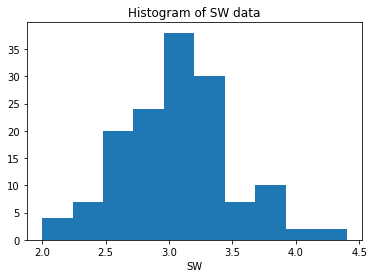

In [263]:
plt.hist(data["SW"])
plt.title('Histogram of SW data')
plt.xlabel("SW")

In [264]:
SW_median = data['SW'].median()

In [265]:
data['SW'] = data['SW'].fillna(SW_median)

In [266]:
data.isna().sum()

SL                0
SW                0
PL                6
PW                0
Classification    0
dtype: int64

Text(0.5, 0, 'PL')

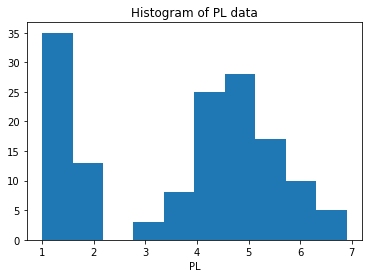

In [267]:
plt.hist(data["PL"])
plt.title('Histogram of PL data')
plt.xlabel("PL")

In [268]:
PL_median = data['PL'].median()

In [269]:
data['PL'] = data['PL'].fillna(SW_median)

In [270]:
data.isna().sum() # now we have handled the null values

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x184500887c0>,
 'caps': [<matplotlib.lines.Line2D at 0x18450088d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x184500884f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1845007c340>],
 'fliers': [<matplotlib.lines.Line2D at 0x1845007c610>],
 'means': []}

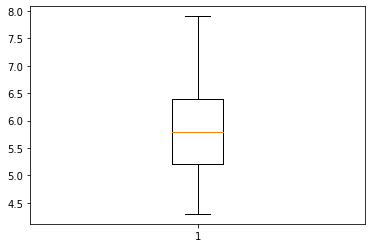

In [271]:
plt.boxplot(data['SL'])

{'whiskers': [<matplotlib.lines.Line2D at 0x18452034670>,
 'caps': [<matplotlib.lines.Line2D at 0x18452034c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x184520343a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1845203c1f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1845203c4c0>],
 'means': []}

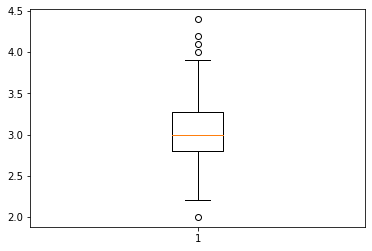

In [272]:
plt.boxplot(data['SW']) # Here we have outliers, so we need to handle it.

{'whiskers': [<matplotlib.lines.Line2D at 0x18452065a60>,
 'caps': [<matplotlib.lines.Line2D at 0x18452071040>,
 'boxes': [<matplotlib.lines.Line2D at 0x18452065790>],
 'medians': [<matplotlib.lines.Line2D at 0x184520715e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x184520718b0>],
 'means': []}

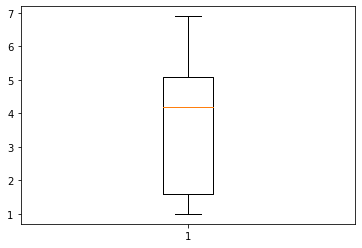

In [273]:
plt.boxplot(data['PL'])

Handling outliers in SW

In [274]:
drop_index = np.where(data['SW']>3.9)

In [275]:
data.shape

(150, 5)

In [276]:
data = data.drop(drop_index[0])

In [277]:
data.shape

(146, 5)

In [278]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# 3. Find out which classification model gives the best result (also do random 
# forest algorithm)


In [279]:
data

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,Iris-setosa
1,4.900000,3.0,1.4,0.2,Iris-setosa
2,5.855944,3.2,1.3,0.2,Iris-setosa
3,4.600000,3.1,1.5,0.2,Iris-setosa
4,5.000000,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.700000,3.0,5.2,2.3,Iris-virginica
146,6.300000,2.5,5.0,1.9,Iris-virginica
147,6.500000,3.0,3.0,2.0,Iris-virginica
148,6.200000,3.4,5.4,2.3,Iris-virginica


In [280]:
data['Classification'].value_counts() # The column Classification is our target variable

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        46
Name: Classification, dtype: int64

In [281]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [282]:
x = data[['SL', 'SW', 'PL', 'PW']]

In [283]:
y = data['Classification']

In [284]:
from sklearn.model_selection import train_test_split

In [298]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .3, random_state = 81)


In [299]:
x_train.describe()

,SL,SW,PL,PW
count,102.000000,102.000000,102.000000,102.000000
mean,5.863527,3.029412,3.854902,1.268627
std,0.825965,0.374057,1.729741,0.785888
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.855944,3.000000,4.400000,1.400000
75%,6.400000,3.200000,5.100000,1.900000
max,7.900000,3.800000,6.700000,2.500000


In [300]:
from sklearn.linear_model import LogisticRegression

In [301]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

C:\Users\Silpa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [302]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [303]:
confusion_matrix(y_test, y_pred)

array([[15,  0,  0],
       [ 0, 18,  1],
       [ 0,  1,  9]], dtype=int64)

In [304]:
accuracy_score(y_test, y_pred)

0.9545454545454546

In [305]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
accuracy_score(y_test,y_pred)

0.9545454545454546

In [306]:
from sklearn.tree import DecisionTreeClassifier

In [307]:
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
accuracy_score(y_test,y_pred)

0.9545454545454546

In [308]:
from sklearn.ensemble import RandomForestClassifier

In [311]:
rf= RandomForestClassifier(n_estimators = 200)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.9772727272727273

So from the above result it is evident that RandomForestClassifier works best, as per the accuracy. But since the data, we have, is very much less the result can be varied. The model works best when we have a large no of data